In [ ]:
import tensorflow as tf
import os
gpus =  tf.config.experimental.list_physical_devices('GPU')
gpus
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
directory = '/content/drive/MyDrive/RESEARCH/DATA2/Sohas_weapon-Classification'
data = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 8945 files belonging to 6 classes.


In [ ]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# x = Images
# y = Labels
data = data.map(lambda x,y: (x/255,y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch=scaled_iterator.next()

In [ ]:
batch[1][:]

array([3, 3, 1, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 0, 2, 3, 5, 5, 4, 3, 2, 3,
       3, 3, 1, 3, 1, 0, 1, 3, 3, 4], dtype=int32)

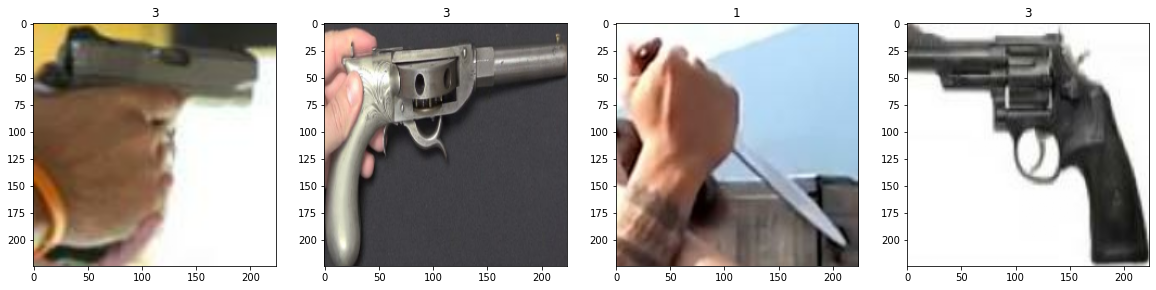

In [ ]:
#1= Non_Dangerous
#0 = Danegrous
fig ,ax, = plt.subplots(ncols=4,figsize=(20,20))

for idx , img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
len(data)

280

In [ ]:

train_size = int(len(data)*.6)
test_size = int(len(data)*.1)
val_size = int(len(data)*.3)+2


In [ ]:
print(train_size)

168


In [ ]:
print(test_size)

28


In [ ]:
print(val_size)

86


In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
test

<TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D,Dense,Flatten, Dropout, AveragePooling2D, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization

In [ ]:
model = Sequential()

In [ ]:
import tensorflow as tf
model.add(Conv2D(64,(3,3),1,activation='selu',input_shape=(256,256,3), use_bias = True , ))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3),1,activation='selu',use_bias = True,kernel_regularizer=tf.keras.regularizers.L2(l=0.015,)))
model.add(MaxPooling2D())

model.add(Conv2D(256,(3,3),1,activation='selu',use_bias=True,kernel_regularizer=tf.keras.regularizers.L2(l=0.015,) ))
model.add(MaxPooling2D())

model.add(Conv2D(256,(3,3),1,activation='selu',use_bias=True,kernel_regularizer=tf.keras.regularizers.L2(l=0.015,) ))
model.add(MaxPooling2D())


model.add(Flatten())
model.add(Dense(128,activation='selu',use_bias=True, kernel_initializer=tf.keras.initializers.LecunNormal(seed=None)))
model.add(Dropout(0.3))
model.add(Dense(256,activation='selu',use_bias=True, kernel_initializer=tf.keras.initializers.LecunNormal(seed=None)))
model.add(Dropout(0.3))
model.add(Dense(256,activation='selu',use_bias=True, kernel_initializer=tf.keras.initializers.LecunNormal(seed=None)))
model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))

In [ ]:
model.compile(optimizer = 'adam',
              loss = tf.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 256)      0

In [ ]:
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

import datetime
log_dir = '/content/drive/MyDrive/RESEARCH/Logs' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
hist = model.fit(train,epochs=15,validation_data=val,callbacks= [tensorboard_callback])

Epoch 1/15
168/168 [==============================] - 50s 292ms/step - loss: 8.8147 - accuracy: 0.4825 - val_loss: 6.4227 - val_accuracy: 0.1915
Epoch 2/15
168/168 [==============================] - 44s 258ms/step - loss: 3.4607 - accuracy: 0.5761 - val_loss: 3.4069 - val_accuracy: 0.3289
Epoch 3/15
168/168 [==============================] - 44s 257ms/step - loss: 1.8017 - accuracy: 0.6505 - val_loss: 1.9368 - val_accuracy: 0.4982
Epoch 4/15
168/168 [==============================] - 46s 272ms/step - loss: 1.2744 - accuracy: 0.6983 - val_loss: 1.8166 - val_accuracy: 0.5051
Epoch 5/15
168/168 [==============================] - 45s 264ms/step - loss: 1.0427 - accuracy: 0.7364 - val_loss: 1.3592 - val_accuracy: 0.6021
Epoch 6/15
168/168 [==============================] - 43s 253ms/step - loss: 0.9005 - accuracy: 0.7673 - val_loss: 1.1684 - val_accuracy: 0.7071
Epoch 7/15
168/168 [==============================] - 43s 252ms/step - loss: 0.7155 - accuracy: 0.8205 - val_loss: 1.1171 - val_ac

In [ ]:
hist

In [ ]:
hist.history

{'loss': [8.814705848693848,
  3.460733652114868,
  1.8016666173934937,
  1.2744163274765015,
  1.0427342653274536,
  0.9004924297332764,
  0.7154812812805176,
  0.6908860206604004,
  0.6371809244155884,
  0.5719218254089355,
  0.5965076088905334,
  0.49882540106773376,
  0.49405306577682495,
  0.48112723231315613,
  0.44820550084114075],
 'accuracy': [0.482514888048172,
  0.5760788917541504,
  0.6504836082458496,
  0.6982886791229248,
  0.7364211082458496,
  0.7672991156578064,
  0.820498526096344,
  0.827752947807312,
  0.8534226417541504,
  0.8757440447807312,
  0.8815104365348816,
  0.9075520634651184,
  0.9086681604385376,
  0.9122023582458496,
  0.926153302192688],
 'val_loss': [6.422657012939453,
  3.4068603515625,
  1.936822533607483,
  1.816611409187317,
  1.3591986894607544,
  1.1683658361434937,
  1.1171194314956665,
  1.4959486722946167,
  1.362392783164978,
  1.447230577468872,
  1.1907949447631836,
  1.1877578496932983,
  1.4686305522918701,
  2.900015115737915,
  1.94259

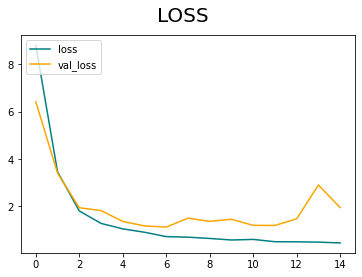

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'teal',label = 'loss')
plt.plot(hist.history['val_loss'],color = 'orange',label = 'val_loss')
plt.suptitle('LOSS',fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

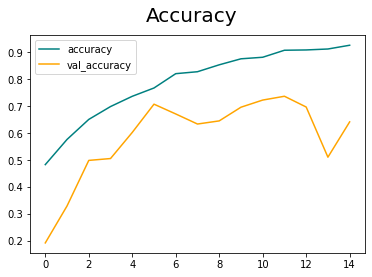

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color = 'teal',label = 'accuracy')
plt.plot(hist.history['val_accuracy'],color = 'orange',label = 'val_accuracy')
plt.suptitle('Accuracy',fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

In [ ]:
import cv2

In [ ]:
img = cv2.imread('/content/drive/MyDrive/RESEARCH/images.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show

In [ ]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))

In [ ]:
yhat

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('/content/drive/MyDrive/RESEARCH','models','ModelFiNAL_e12_acc8_valacc_77.h5'))

In [ ]:
new_model = load_model(os.path.join('/content/drive/MyDrive/RESEARCH/models/Model_e12_acc79_valacc_72.h5'))

In [ ]:
img2 = cv2.imread('/content/drive/MyDrive/RESEARCH/images.jpeg')
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.show

In [ ]:
resize21 = tf.image.resize(img2,(256,256))
plt.imshow(resize21.numpy().astype(int))
plt.show()

In [ ]:
yhat32 = new_model.predict(np.expand_dims(resize21/255,0))

In [ ]:
yhat32

In [ ]:
%load_ext tensorboard

In [ ]:
import plotly.express as px

In [ ]:
Hist1 = {'Loss':hist.history['loss'],
          'Val_Loss':hist.history['val_loss']}

In [ ]:
Hist1

In [ ]:
fig1 = px.line(Hist1,title="Loss,Val_loss Graph",markers = True)
fig1.show()

In [ ]:
Hist2 = {'Accuracy':hist.history['accuracy'],
          'Val_Accuracy':hist.history['val_accuracy']}

In [ ]:
fig2 = px.line(Hist2,title="Accuracy,Val_Accuracy Graph",markers = True)
fig2.show()

In [ ]:
model.evaluate(test)

In [ ]:
import tensorflow as tf
tf . print(tf. __version__)